# Importing Libraries

In [368]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os
import sklearn.metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Question-1

## Loading raw accelerometer data

In [369]:
# Load the .npy files from the parent directory
X_train = np.load(os.path.join('..', 'Saved_Dataset', 'X_train.npy'))
y_train = np.load(os.path.join('..', 'Saved_Dataset', 'y_train.npy'))

X_test = np.load(os.path.join('..', 'Saved_Dataset', 'X_test.npy'))
y_test = np.load(os.path.join('..', 'Saved_Dataset', 'y_test.npy'))

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (126, 500, 3)
X_test: (54, 500, 3)
y_train: (126,)
y_test: (54,)


## Reshaping X_train from shape (126,500,3) to (126,1500)

In [370]:
x_train=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
x_test=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (126, 1500)
x_test: (54, 1500)
y_train: (126,)
y_test: (54,)


## Training the model

In [371]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [372]:
y_pred=dt.predict(x_test)

In [373]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy:  0.6111111111111112
Precision:  0.5682234432234433
Recall:  0.611111111111111


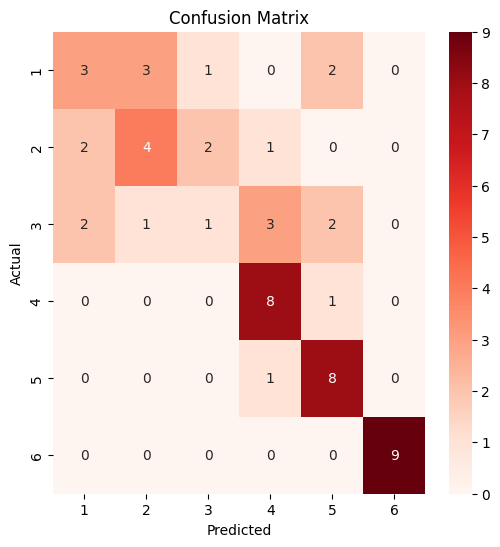

In [374]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Question-2

## Loading features provided by TSFEL

In [375]:
import tsfel
# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg,X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg,X_test, verbose=1,fs =50)

print(f"X_train_tsfel: {X_train_tsfel.shape}")
print(f"X_test_tsfel: {X_test_tsfel.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_tsfel: (126, 1152)
X_test_tsfel: (54, 1152)
y_train: (126,)
y_test: (54,)


## Training the model

In [376]:
dt2=DecisionTreeClassifier(random_state=0)
dt2.fit(X_train_tsfel,y_train)

DecisionTreeClassifier(random_state=0)

## Testing the model

In [377]:
y_tsfel_pred=dt2.predict(X_test_tsfel)

In [378]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_tsfel_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_tsfel_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_tsfel_pred,average='macro'))

Accuracy:  0.8703703703703703
Precision:  0.8785473785473785
Recall:  0.8703703703703702


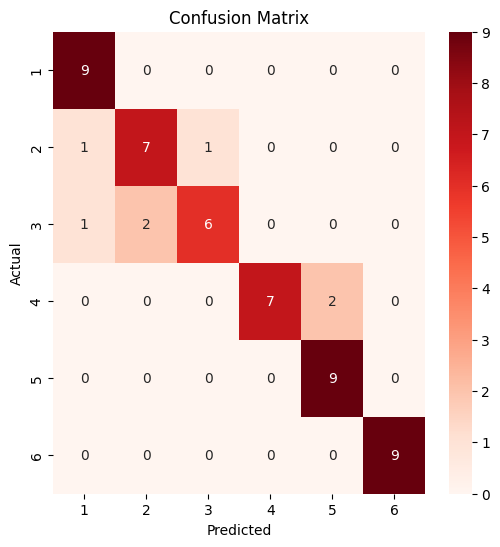

In [379]:
cm = confusion_matrix(y_test, y_tsfel_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Question-3

## Loading the UCI-HAR dataset

In [380]:
X_train = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/X_train.txt')
y_train = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/y_train.txt')

X_test = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/X_test.txt')
y_test = np.loadtxt('/Users/umangshikarvar/Desktop/ML assignment/y_test.txt')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (7352, 561)
X_test: (2947, 561)
y_train: (7352,)
y_test: (2947,)


## Training the model

In [381]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## Testing the model

In [382]:
y_pred=dt.predict(X_test)

In [383]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy:  0.8595181540549711
Precision:  0.8593123072231502
Recall:  0.856138331486871


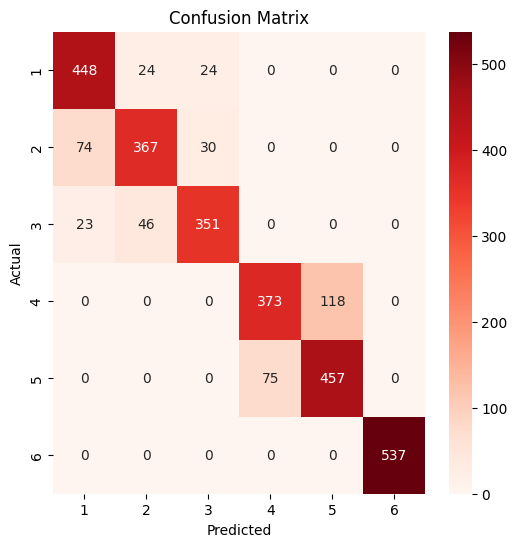

In [384]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparision of results

On comparing the results of the 3 models shown above, the model that uses tsfel features performs the best having accuracy of 87.03%, then comes the model which uses the features provided in UCI-HAR dataset with an accuracy of 85.95% and model that uses raw accelerometer data performs the worst with an accuracy of 61.11%.

This clearly shows that pre-precoessing of the data helps significantly in improving the performance of the model.